In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import hypergeom

In [2]:
nameTable_f = './haloGeneNameConvertionTable.csv'
nameTable_df = pd.read_csv(nameTable_f)
# nameTable_df['old_locus_tag']=[x.strip("[]'") if pd.isna(x) else x for x in nameTable_df['old_locus_tag']]
nameTable_df.head(10)

,Unnamed: 0,locusId,old_locus_tag,gene,product,protein_id,db_xref
0,0,HNEAP_RS00015,['Hneap_0001'],['dnaA'],['chromosomal replication initiator protein Dn...,['WP_041600463.1'],['GI:753844846']
1,1,HNEAP_RS00020,['Hneap_0002'],NaN,['DNA polymerase III subunit beta'],['WP_012822905.1'],['GI:502585110']
2,2,HNEAP_RS00025,['Hneap_0003'],NaN,['DNA replication and repair protein RecF'],['WP_041600303.1'],['GI:753844686']
3,3,HNEAP_RS00030,['Hneap_0004'],NaN,['DNA topoisomerase (ATP-hydrolyzing) subunit B'],['WP_012822907.1'],['GI:502585112']
4,4,HNEAP_RS00035,['Hneap_0005'],NaN,['LemA family protein'],['WP_012822908.1'],['GI:502585113']
5,5,HNEAP_RS00040,['Hneap_0006'],NaN,['hypothetical protein'],['WP_012822909.1'],['GI:502585114']
6,6,HNEAP_RS00045,['Hneap_0007'],NaN,['exodeoxyribonuclease III'],['WP_012822910.1'],['GI:502585115']
7,7,HNEAP_RS00050,['Hneap_0008'],NaN,['ABC transporter permease'],['WP_012822911.1'],['GI:502585116']
8,8,HNEAP_RS00055,['Hneap_0009'],NaN,['ABC transporter'],['WP_049772428.1'],['GI:908628395']
9,9,HNEAP_RS00060,['Hneap_0010'],NaN,['arylesterase'],['WP_012822913.1'],['GI:502585118']


In [3]:
nameEssential_f = './Fig1STable1.csv'
nameEssential_df = pd.read_csv(nameEssential_f)
display(nameEssential_df.head(10))
print('total genes: %s' %len(nameEssential_df))
print('essential genes: %s' %len(nameEssential_df[nameEssential_df.essentiality=='essential']))

,Unnamed: 0,locusId,type,scaffoldId,begin,end,length,strand,desc,GC,nTA,pval_raw_rep1,pval_corr_rep1,n_inserts_rep1,pval_raw_rep2,pval_corr_rep2,n_inserts_rep2,essentiality
0,0,HNEAP_RS00015,1,NC_013422.1,159,1559,1400.0,+,chromosomal replication initiator protein DnaA,0.5353,30,4.124691e-22,9.932256e-19,2.0,2.204458e-21,5.308334e-18,2.0,essential
1,1,HNEAP_RS00020,1,NC_013422.1,1623,2735,1112.0,+,DNA polymerase III subunit beta,0.5346,22,3.051187e-17,7.347258e-14,2.0,1.140739e-16,2.746900e-13,2.0,essential
2,2,HNEAP_RS00025,1,NC_013422.1,2815,3840,1025.0,+,DNA replication and repair protein RecF,0.5536,16,9.999327e-01,2.407838e+03,66.0,9.999144e-01,2.407794e+03,64.0,nonessential
3,3,HNEAP_RS00030,1,NC_013422.1,4029,6482,2453.0,+,DNA topoisomerase (ATP-hydrolyzing) subunit B,0.5534,49,7.192812e-44,1.732029e-40,0.0,1.512865e-42,3.642978e-39,0.0,essential
4,4,HNEAP_RS00035,1,NC_013422.1,6658,7233,575.0,+,LemA family protein,0.5330,16,9.999644e-01,2.407914e+03,43.0,9.997002e-01,2.407278e+03,39.0,nonessential
5,5,HNEAP_RS00040,1,NC_013422.1,7248,8171,923.0,+,hypothetical protein,0.5390,22,9.996937e-01,2.407262e+03,58.0,9.998580e-01,2.407658e+03,58.0,nonessential
6,6,HNEAP_RS00045,1,NC_013422.1,8681,9454,773.0,+,exodeoxyribonuclease III,0.5103,26,9.878855e-01,2.378828e+03,43.0,9.883955e-01,2.380056e+03,42.0,nonessential
7,7,HNEAP_RS00050,1,NC_013422.1,9655,12165,2510.0,-,ABC transporter permease,0.5707,48,9.636449e-01,2.320457e+03,117.0,9.655563e-01,2.325060e+03,114.0,nonessential
8,8,HNEAP_RS00055,1,NC_013422.1,12156,12896,740.0,-,ABC transporter,0.5789,10,9.999952e-01,2.407988e+03,55.0,9.999916e-01,2.407980e+03,53.0,nonessential
9,9,HNEAP_RS00060,1,NC_013422.1,13056,13742,686.0,+,arylesterase,0.5546,16,9.999999e-01,2.408000e+03,57.0,9.999999e-01,2.408000e+03,56.0,nonessential


total genes: 2408
essential genes: 551


In [4]:
img_f = './imgHaloGeneAnnot.xls'
dat = {}
img = open(img_f)
l=None
for i,l in enumerate(img):
    line=l.split(sep='\t')
#     print(line.split(sep='\t'))
    loc = line[1]
    isWhat = line[2]
    if i == 0:
        continue
    if loc not in dat.keys():
        dat[loc]=["['"+loc+"']",'','']
    if isWhat == 'COG_category':
        dat[loc][1]=line[3]
    elif isWhat.startswith('COG'):
        dat[loc][2]=isWhat
#     print(dat)
img.close()
# print(dat)
img_df=pd.DataFrame(list(dat.values()),columns=['old_locus_tag','COG_category','COG'])
img_df.head(10)

,old_locus_tag,COG_category,COG
0,['Hneap_0001'],"[L] Replication, recombination and repair",COG0593
1,[''],,
2,['Hneap_0002'],"[L] Replication, recombination and repair",COG0592
3,['Hneap_0003'],"[L] Replication, recombination and repair",COG1195
4,['Hneap_0004'],"[L] Replication, recombination and repair",COG0187
5,['Hneap_0005'],[S] Function unknown,COG1704
6,['Hneap_0006'],,
7,['Hneap_0007'],"[L] Replication, recombination and repair",COG0708
8,['Hneap_0008'],"[Q] Secondary metabolites biosynthesis, transp...",COG3127
9,['Hneap_0009'],"[Q] Secondary metabolites biosynthesis, transp...",COG4181


In [5]:
counts = img_df.groupby('COG_category').size()
print(counts)
print(counts.sum())

percents = (counts/counts.sum())*100
print(percents)
percents.sum()

COG_category
                                                                     722
[A] RNA processing and modification                                    1
[B] Chromatin structure and dynamics                                   1
[C] Energy production and conversion                                 118
[D] Cell cycle control, cell division, chromosome partitioning        31
[E] Amino acid transport and metabolism                              131
[F] Nucleotide transport and metabolism                               54
[G] Carbohydrate transport and metabolism                             64
[H] Coenzyme transport and metabolism                                 98
[I] Lipid transport and metabolism                                    57
[J] Translation, ribosomal structure and biogenesis                  189
[K] Transcription                                                     74
[L] Replication, recombination and repair                             89
[M] Cell wall/membrane/envelope biogen

100.0

In [6]:
full_df = nameTable_df.merge(img_df,on='old_locus_tag',how='left')
withEssential_df = full_df.merge(nameEssential_df,on='locusId',how='right')
withEssential_df = withEssential_df.replace(r'^\s*$', np.nan, regex=True)
withEssential_df['COG_category'].fillna('No COG',inplace=True)
# withEssential_df[withEssential_df['COG_category']=='']='No COG'
display(withEssential_df.head(10))
print(len(withEssential_df))

,Unnamed: 0_x,locusId,old_locus_tag,gene,product,protein_id,db_xref,COG_category,COG,Unnamed: 0_y,...,desc,GC,nTA,pval_raw_rep1,pval_corr_rep1,n_inserts_rep1,pval_raw_rep2,pval_corr_rep2,n_inserts_rep2,essentiality
0,0.0,HNEAP_RS00015,['Hneap_0001'],['dnaA'],['chromosomal replication initiator protein Dn...,['WP_041600463.1'],['GI:753844846'],"[L] Replication, recombination and repair",COG0593,0,...,chromosomal replication initiator protein DnaA,0.5353,30,4.124691e-22,9.932256e-19,2.0,2.204458e-21,5.308334e-18,2.0,essential
1,1.0,HNEAP_RS00020,['Hneap_0002'],NaN,['DNA polymerase III subunit beta'],['WP_012822905.1'],['GI:502585110'],"[L] Replication, recombination and repair",COG0592,1,...,DNA polymerase III subunit beta,0.5346,22,3.051187e-17,7.347258e-14,2.0,1.140739e-16,2.746900e-13,2.0,essential
2,2.0,HNEAP_RS00025,['Hneap_0003'],NaN,['DNA replication and repair protein RecF'],['WP_041600303.1'],['GI:753844686'],"[L] Replication, recombination and repair",COG1195,2,...,DNA replication and repair protein RecF,0.5536,16,9.999327e-01,2.407838e+03,66.0,9.999144e-01,2.407794e+03,64.0,nonessential
3,3.0,HNEAP_RS00030,['Hneap_0004'],NaN,['DNA topoisomerase (ATP-hydrolyzing) subunit B'],['WP_012822907.1'],['GI:502585112'],"[L] Replication, recombination and repair",COG0187,3,...,DNA topoisomerase (ATP-hydrolyzing) subunit B,0.5534,49,7.192812e-44,1.732029e-40,0.0,1.512865e-42,3.642978e-39,0.0,essential
4,4.0,HNEAP_RS00035,['Hneap_0005'],NaN,['LemA family protein'],['WP_012822908.1'],['GI:502585113'],[S] Function unknown,COG1704,4,...,LemA family protein,0.5330,16,9.999644e-01,2.407914e+03,43.0,9.997002e-01,2.407278e+03,39.0,nonessential
5,5.0,HNEAP_RS00040,['Hneap_0006'],NaN,['hypothetical protein'],['WP_012822909.1'],['GI:502585114'],No COG,NaN,5,...,hypothetical protein,0.5390,22,9.996937e-01,2.407262e+03,58.0,9.998580e-01,2.407658e+03,58.0,nonessential
6,6.0,HNEAP_RS00045,['Hneap_0007'],NaN,['exodeoxyribonuclease III'],['WP_012822910.1'],['GI:502585115'],"[L] Replication, recombination and repair",COG0708,6,...,exodeoxyribonuclease III,0.5103,26,9.878855e-01,2.378828e+03,43.0,9.883955e-01,2.380056e+03,42.0,nonessential
7,7.0,HNEAP_RS00050,['Hneap_0008'],NaN,['ABC transporter permease'],['WP_012822911.1'],['GI:502585116'],"[Q] Secondary metabolites biosynthesis, transp...",COG3127,7,...,ABC transporter permease,0.5707,48,9.636449e-01,2.320457e+03,117.0,9.655563e-01,2.325060e+03,114.0,nonessential
8,8.0,HNEAP_RS00055,['Hneap_0009'],NaN,['ABC transporter'],['WP_049772428.1'],['GI:908628395'],"[Q] Secondary metabolites biosynthesis, transp...",COG4181,8,...,ABC transporter,0.5789,10,9.999952e-01,2.407988e+03,55.0,9.999916e-01,2.407980e+03,53.0,nonessential
9,9.0,HNEAP_RS00060,['Hneap_0010'],NaN,['arylesterase'],['WP_012822913.1'],['GI:502585118'],[E] Amino acid transport and metabolism,COG2755,9,...,arylesterase,0.5546,16,9.999999e-01,2.408000e+03,57.0,9.999999e-01,2.408000e+03,56.0,nonessential


2408


In [7]:
counts_genome = withEssential_df.groupby('COG_category').size()
display(counts_genome)
print(counts_genome.sum())
percents_genome = (counts_genome/counts_genome.sum())*100
display(percents_genome)
percents_genome.sum()

COG_category
No COG                                                               734
[A] RNA processing and modification                                    1
[B] Chromatin structure and dynamics                                   1
[C] Energy production and conversion                                 118
[D] Cell cycle control, cell division, chromosome partitioning        28
[E] Amino acid transport and metabolism                              128
[F] Nucleotide transport and metabolism                               54
[G] Carbohydrate transport and metabolism                             62
[H] Coenzyme transport and metabolism                                 95
[I] Lipid transport and metabolism                                    56
[J] Translation, ribosomal structure and biogenesis                  186
[K] Transcription                                                     71
[L] Replication, recombination and repair                             84
[M] Cell wall/membrane/envelope biogen

2408


COG_category
No COG                                                               30.481728
[A] RNA processing and modification                                   0.041528
[B] Chromatin structure and dynamics                                  0.041528
[C] Energy production and conversion                                  4.900332
[D] Cell cycle control, cell division, chromosome partitioning        1.162791
[E] Amino acid transport and metabolism                               5.315615
[F] Nucleotide transport and metabolism                               2.242525
[G] Carbohydrate transport and metabolism                             2.574751
[H] Coenzyme transport and metabolism                                 3.945183
[I] Lipid transport and metabolism                                    2.325581
[J] Translation, ribosomal structure and biogenesis                   7.724252
[K] Transcription                                                     2.948505
[L] Replication, recombination and repa

99.99999999999999

In [8]:
withEssential_df

,Unnamed: 0_x,locusId,old_locus_tag,gene,product,protein_id,db_xref,COG_category,COG,Unnamed: 0_y,...,desc,GC,nTA,pval_raw_rep1,pval_corr_rep1,n_inserts_rep1,pval_raw_rep2,pval_corr_rep2,n_inserts_rep2,essentiality
0,0.0,HNEAP_RS00015,['Hneap_0001'],['dnaA'],['chromosomal replication initiator protein Dn...,['WP_041600463.1'],['GI:753844846'],"[L] Replication, recombination and repair",COG0593,0,...,chromosomal replication initiator protein DnaA,0.5353,30,4.124691e-22,9.932256e-19,2.0,2.204458e-21,5.308334e-18,2.0,essential
1,1.0,HNEAP_RS00020,['Hneap_0002'],NaN,['DNA polymerase III subunit beta'],['WP_012822905.1'],['GI:502585110'],"[L] Replication, recombination and repair",COG0592,1,...,DNA polymerase III subunit beta,0.5346,22,3.051187e-17,7.347258e-14,2.0,1.140739e-16,2.746900e-13,2.0,essential
2,2.0,HNEAP_RS00025,['Hneap_0003'],NaN,['DNA replication and repair protein RecF'],['WP_041600303.1'],['GI:753844686'],"[L] Replication, recombination and repair",COG1195,2,...,DNA replication and repair protein RecF,0.5536,16,9.999327e-01,2.407838e+03,66.0,9.999144e-01,2.407794e+03,64.0,nonessential
3,3.0,HNEAP_RS00030,['Hneap_0004'],NaN,['DNA topoisomerase (ATP-hydrolyzing) subunit B'],['WP_012822907.1'],['GI:502585112'],"[L] Replication, recombination and repair",COG0187,3,...,DNA topoisomerase (ATP-hydrolyzing) subunit B,0.5534,49,7.192812e-44,1.732029e-40,0.0,1.512865e-42,3.642978e-39,0.0,essential
4,4.0,HNEAP_RS00035,['Hneap_0005'],NaN,['LemA family protein'],['WP_012822908.1'],['GI:502585113'],[S] Function unknown,COG1704,4,...,LemA family protein,0.5330,16,9.999644e-01,2.407914e+03,43.0,9.997002e-01,2.407278e+03,39.0,nonessential
5,5.0,HNEAP_RS00040,['Hneap_0006'],NaN,['hypothetical protein'],['WP_012822909.1'],['GI:502585114'],No COG,NaN,5,...,hypothetical protein,0.5390,22,9.996937e-01,2.407262e+03,58.0,9.998580e-01,2.407658e+03,58.0,nonessential
6,6.0,HNEAP_RS00045,['Hneap_0007'],NaN,['exodeoxyribonuclease III'],['WP_012822910.1'],['GI:502585115'],"[L] Replication, recombination and repair",COG0708,6,...,exodeoxyribonuclease III,0.5103,26,9.878855e-01,2.378828e+03,43.0,9.883955e-01,2.380056e+03,42.0,nonessential
7,7.0,HNEAP_RS00050,['Hneap_0008'],NaN,['ABC transporter permease'],['WP_012822911.1'],['GI:502585116'],"[Q] Secondary metabolites biosynthesis, transp...",COG3127,7,...,ABC transporter permease,0.5707,48,9.636449e-01,2.320457e+03,117.0,9.655563e-01,2.325060e+03,114.0,nonessential
8,8.0,HNEAP_RS00055,['Hneap_0009'],NaN,['ABC transporter'],['WP_049772428.1'],['GI:908628395'],"[Q] Secondary metabolites biosynthesis, transp...",COG4181,8,...,ABC transporter,0.5789,10,9.999952e-01,2.407988e+03,55.0,9.999916e-01,2.407980e+03,53.0,nonessential
9,9.0,HNEAP_RS00060,['Hneap_0010'],NaN,['arylesterase'],['WP_012822913.1'],['GI:502585118'],[E] Amino acid transport and metabolism,COG2755,9,...,arylesterase,0.5546,16,9.999999e-01,2.408000e+03,57.0,9.999999e-01,2.408000e+03,56.0,nonessential


In [9]:
essential_df = withEssential_df[withEssential_df['essentiality']=='essential']
counts_ess = essential_df.groupby('COG_category').size()
print(counts_ess)
print(counts_ess.sum())
percents_ess = (counts_ess/counts_ess.sum())*100
print(percents_ess)
percents_ess.sum()

COG_category
No COG                                                               46
[C] Energy production and conversion                                 50
[D] Cell cycle control, cell division, chromosome partitioning       14
[E] Amino acid transport and metabolism                              67
[F] Nucleotide transport and metabolism                              29
[G] Carbohydrate transport and metabolism                            18
[H] Coenzyme transport and metabolism                                55
[I] Lipid transport and metabolism                                   26
[J] Translation, ribosomal structure and biogenesis                  91
[K] Transcription                                                    14
[L] Replication, recombination and repair                            19
[M] Cell wall/membrane/envelope biogenesis                           50
[O] Posttranslational modification, protein turnover, chaperones     18
[P] Inorganic ion transport and metabolism         

99.99999999999999

In [10]:
fold_enrich = percents_ess/percents_genome
fold_enrich[pd.isna(fold_enrich)]=0
fold_enrich

COG_category
No COG                                                               0.273884
[A] RNA processing and modification                                  0.000000
[B] Chromatin structure and dynamics                                 0.000000
[C] Energy production and conversion                                 1.851795
[D] Cell cycle control, cell division, chromosome partitioning       2.185118
[E] Amino acid transport and metabolism                              2.287545
[F] Nucleotide transport and metabolism                              2.346979
[G] Carbohydrate transport and metabolism                            1.268778
[H] Coenzyme transport and metabolism                                2.530137
[I] Lipid transport and metabolism                                   2.029038
[J] Translation, ribosomal structure and biogenesis                  2.138126
[K] Transcription                                                    0.861737
[L] Replication, recombination and repair          

In [11]:
counts_ess['[C] Energy production and conversion']

50

In [12]:
counts_genome.index

Index(['No COG', '[A] RNA processing and modification',
       '[B] Chromatin structure and dynamics',
       '[C] Energy production and conversion',
       '[D] Cell cycle control, cell division, chromosome partitioning',
       '[E] Amino acid transport and metabolism',
       '[F] Nucleotide transport and metabolism',
       '[G] Carbohydrate transport and metabolism',
       '[H] Coenzyme transport and metabolism',
       '[I] Lipid transport and metabolism',
       '[J] Translation, ribosomal structure and biogenesis',
       '[K] Transcription', '[L] Replication, recombination and repair',
       '[M] Cell wall/membrane/envelope biogenesis', '[N] Cell motility',
       '[O] Posttranslational modification, protein turnover, chaperones',
       '[P] Inorganic ion transport and metabolism',
       '[Q] Secondary metabolites biosynthesis, transport and catabolism',
       '[R] General function prediction only', '[S] Function unknown',
       '[T] Signal transduction mechanisms',
    

In [26]:
M=counts_genome.sum()
N=counts_ess.sum()
ps=counts_genome.copy()
for i in counts_genome.index:
#     print(i) 
    n=counts_genome[i]
    X = counts_ess.get(i, 0)
    if percents_ess.get(i, 0)<percents_genome[i]:
        p=hypergeom.cdf(X,M,n,N)
    if percents_ess.get(i, 0)>percents_genome[i]:
        p=hypergeom.sf(X,M,n,N)
    ps.loc[i]=p
print(ps)
print(len(ps))
print(ps[ps>1])
ps=ps*len(ps)
ps[ps>1]

COG_category
No COG                                                               1.688865e-44
[A] RNA processing and modification                                  7.711794e-01
[B] Chromatin structure and dynamics                                 7.711794e-01
[C] Energy production and conversion                                 3.855227e-07
[D] Cell cycle control, cell division, chromosome partitioning       3.780203e-04
[E] Amino acid transport and metabolism                              1.824549e-14
[F] Nucleotide transport and metabolism                              1.496457e-07
[G] Carbohydrate transport and metabolism                            9.588377e-02
[H] Coenzyme transport and metabolism                                1.139437e-14
[I] Lipid transport and metabolism                                   2.256717e-05
[J] Translation, ribosomal structure and biogenesis                  9.957173e-17
[K] Transcription                                                    3.150165e-01
[L]

COG_category
[A] RNA processing and modification                                  19.279485
[B] Chromatin structure and dynamics                                 19.279485
[G] Carbohydrate transport and metabolism                             2.397094
[K] Transcription                                                     7.875411
[L] Replication, recombination and repair                            13.455559
[O] Posttranslational modification, protein turnover, chaperones      9.670105
[P] Inorganic ion transport and metabolism                            2.779077
[Q] Secondary metabolites biosynthesis, transport and catabolism      4.926744
[U] Intracellular trafficking, secretion, and vesicular transport     1.465454
[W] Extracellular structures                                          1.849604
[X] Mobilome: prophages, transposons                                  5.747038
dtype: float64

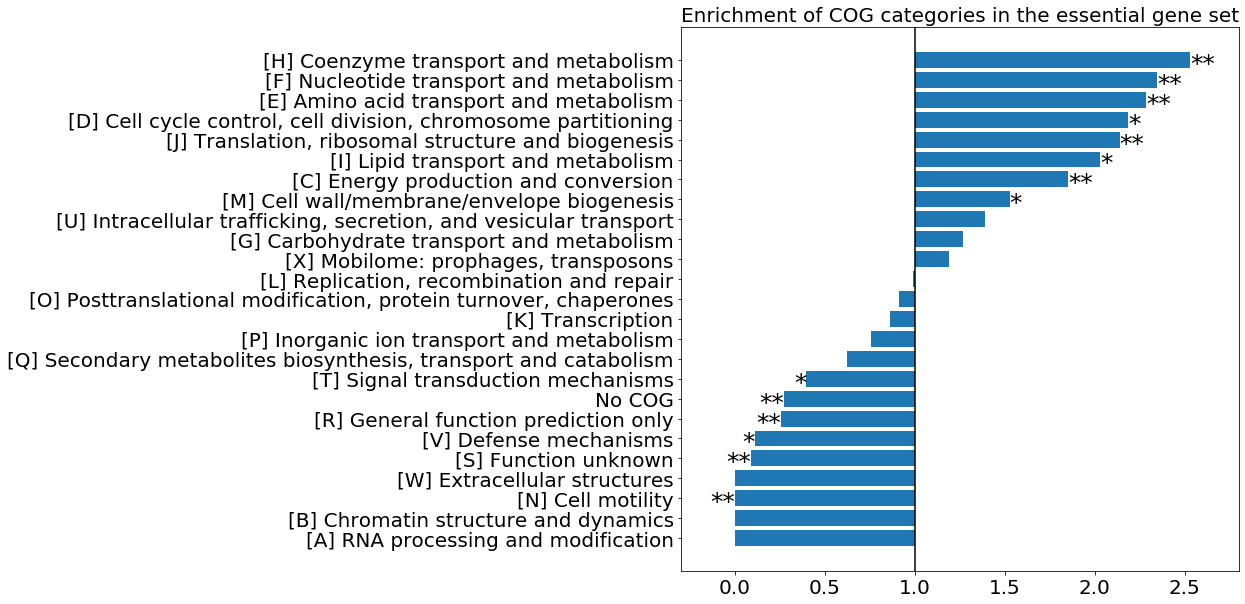

In [14]:
plt.figure(figsize=(10,10))
pos = np.arange(len(fold_enrich.index))
erich = (fold_enrich-1)
erich=erich.sort_values()
plt.barh(pos,erich)
plt.yticks(pos,erich.index)
fontsize = 25
for pi in ps.index:
    p=ps[pi]
    po = erich.index.get_loc(pi)
#     if p<0.0005:
#         if erich[pi]>0:
#             plt.text(erich[pi],pos[po]-0.2,'***',ha='left',va='center',fontsize =fontsize)
#         if erich[pi]<0:
#             plt.text(erich[pi],pos[po]-0.2,'***',ha='right',va='center',fontsize =fontsize)
    if p<0.0005:
        if erich[pi]>0:
            plt.text(erich[pi],pos[po]-0.2,'**',ha='left',va='center',fontsize =fontsize)
        if erich[pi]<0:
            plt.text(erich[pi],pos[po]-0.2,'**',ha='right',va='center',fontsize =fontsize)
    elif p<0.05:
        if erich[pi]>0:
            plt.text(erich[pi],pos[po]-0.2,'*',ha='left',va='center',fontsize =fontsize)
        if erich[pi]<0:
            plt.text(erich[pi],pos[po]-0.2,'*',ha='right',va='center',fontsize =fontsize)
# plt.gca().invert_yaxis()
plt.axvline(color='k')
poss,ticks=plt.xticks()
plt.xticks(poss,[str(x+1) for x in poss],fontsize=20)
plt.xlim(-1.30,1.80)
plt.yticks(fontsize=20)

plt.title('Enrichment of COG categories in the essential gene set',fontsize=20)

plt.savefig('./enrichment.eps',format='eps', bbox_inches='tight')

plt.show()

In [15]:
cols = {
    'Number in genome':counts_genome,
    'Number essential':counts_ess,
    'p value':ps
}
stats_df = pd.DataFrame(cols).fillna(int(0),axis=1)
stats_df['Number essential']=stats_df['Number essential'].astype('int')
stats_df.to_csv('./statistics.csv')
stats_df

,Number in genome,Number essential,p value
No COG,734,46,4.222162e-43
[A] RNA processing and modification,1,0,1.927949e+01
[B] Chromatin structure and dynamics,1,0,1.927949e+01
[C] Energy production and conversion,118,50,9.638107e-06
"[D] Cell cycle control, cell division, chromosome partitioning",28,14,9.450508e-03
[E] Amino acid transport and metabolism,128,67,8.641143e-11
[F] Nucleotide transport and metabolism,54,29,3.741182e-06
[G] Carbohydrate transport and metabolism,62,18,2.397094e+00
[H] Coenzyme transport and metabolism,95,55,0.000000e+00
[I] Lipid transport and metabolism,56,26,5.641794e-04


In [16]:
for row in stats_df.iterrows():
    print(row[0]+': n$_{genome}$ = '+str(row[1][0])+' n$_{essential}$ = '+str(row[1][1])+' p = '+str(row[1][2]))

No COG: n$_{genome}$ = 734.0 n$_{essential}$ = 46.0 p = 4.222162300659962e-43
[A] RNA processing and modification: n$_{genome}$ = 1.0 n$_{essential}$ = 0.0 p = 19.279485049824547
[B] Chromatin structure and dynamics: n$_{genome}$ = 1.0 n$_{essential}$ = 0.0 p = 19.279485049824547
[C] Energy production and conversion: n$_{genome}$ = 118.0 n$_{essential}$ = 50.0 p = 9.638106762688281e-06
[D] Cell cycle control, cell division, chromosome partitioning: n$_{genome}$ = 28.0 n$_{essential}$ = 14.0 p = 0.009450508218328268
[E] Amino acid transport and metabolism: n$_{genome}$ = 128.0 n$_{essential}$ = 67.0 p = 8.64114335641375e-11
[F] Nucleotide transport and metabolism: n$_{genome}$ = 54.0 n$_{essential}$ = 29.0 p = 3.741182205696525e-06
[G] Carbohydrate transport and metabolism: n$_{genome}$ = 62.0 n$_{essential}$ = 18.0 p = 2.397094148782522
[H] Coenzyme transport and metabolism: n$_{genome}$ = 95.0 n$_{essential}$ = 55.0 p = 0.0
[I] Lipid transport and metabolism: n$_{genome}$ = 56.0 n$_{e

In [17]:
ps[ps>1]

COG_category
[A] RNA processing and modification                                  19.279485
[B] Chromatin structure and dynamics                                 19.279485
[G] Carbohydrate transport and metabolism                             2.397094
[K] Transcription                                                     7.875411
[L] Replication, recombination and repair                            13.455559
[O] Posttranslational modification, protein turnover, chaperones      9.670105
[P] Inorganic ion transport and metabolism                            2.779077
[Q] Secondary metabolites biosynthesis, transport and catabolism      4.926744
[U] Intracellular trafficking, secretion, and vesicular transport     1.465454
[W] Extracellular structures                                          1.849604
[X] Mobilome: prophages, transposons                                  5.747038
dtype: float64

In [67]:
row[1].index

Index(['Number in genome', 'Number essential', 'p value'], dtype='object')